##### Import :

In [102]:
words = open('/workspaces/Zero_to_hero_exercices/data/names.txt', 'r').read().splitlines()
import torch

# Exercice 1 
### Train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?
 


We will implement counting 

##### Counting :

In [111]:
N = torch.zeros((27,27,27), dtype=torch.int32)

In [112]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [113]:
# One choose to keep some useless row like all the words starting by ..+ a letter to conserve the size of N : 27 x 27 x 27

for w in words:
  chs = ['.'] + list(w) + ['.'] 
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    N[ix1, ix2, ix3] += 1

In [114]:
N[0].size()

torch.Size([27, 27])

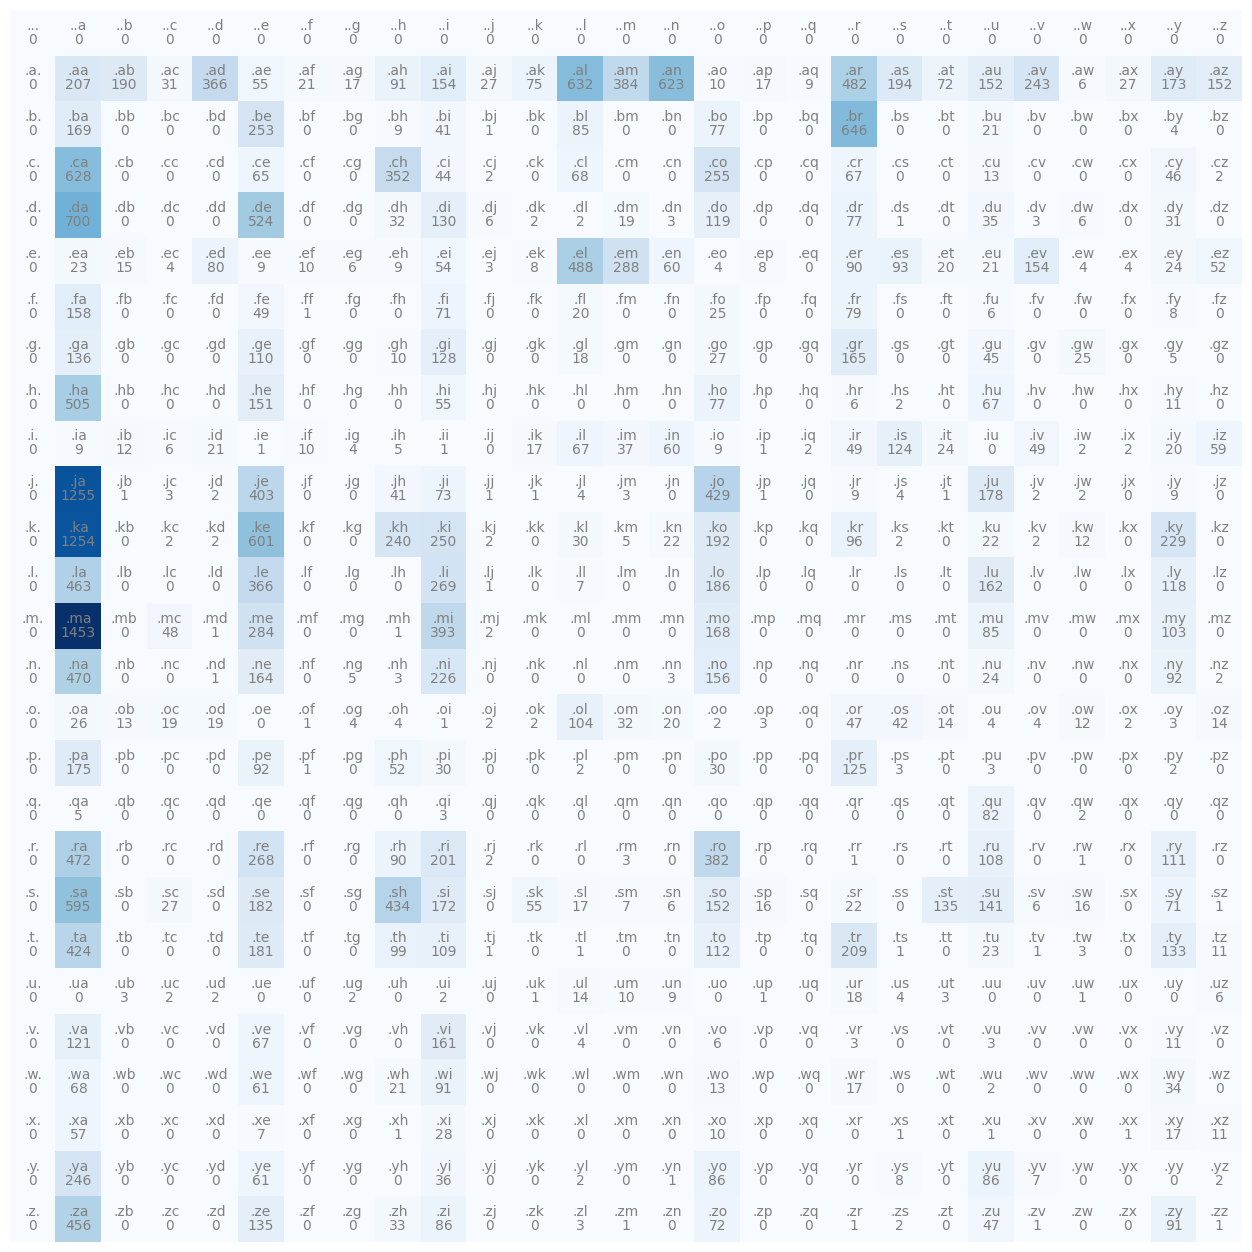

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
ind = 0 # We choose an index for the graph representation
plt.figure(figsize=(16,16))
plt.imshow(N[ind], cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[ind] + itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[ind,i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [44]:
# 27 27 27
# 27 27  1

#One should sum over the colums so the index 2



tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0], dtype=torch.int32)

In [116]:
# One must sum over each line of the tensor 

P = (N+1).float()
print(P[0,1,:])
print(P.sum(2, keepdims=True)[0,1,:])

P /= P.sum(2, keepdims=True)
print(P[0,1,:].sum())

tensor([  1., 208., 191.,  32., 367.,  56.,  22.,  18.,  92., 155.,  28.,  76.,
        633., 385., 624.,  11.,  18.,  10., 483., 195.,  73., 153., 244.,   7.,
         28., 174., 153.])
tensor([4437.])
tensor(1.0000)


In [121]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  
  out = []
  ix1 = 0
  ix2 = 0
  # One choose to set ix2 = 0, so the first letter will be choose randomly, one can choose to set ix2 using the bigram for the first letter to have a better result.
  while True:
    p = P[ix1,ix2]
    ix2 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ix1 = ix2
    out.append(itos[ix2])
    if ix2 == 0:
      break
  print(''.join(out))

juwjde.
ianaqadhp.
cfaywadi.
qforiritopemasareme.
dianaduyanilenani.
dbyaine.
i.
t.
zse.
yinaylaren.


In [120]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:],chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    prob = P[ix1, ix2, ix3]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-410414.9688)
nll=tensor(410414.9688)
2.092747449874878


The loss seems to be better with the trigram method.

# Exercice 2 
### Split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

In [103]:
from torch.utils.data import random_split
train_set, dev_set, test_set = random_split(words,[0.8, 0.1, 0.1],generator= torch.Generator().manual_seed(2147483647))

train_set = list(train_set)
dev_set = list(dev_set)
test_set = list(test_set)
print(train_set)

['waseem', 'zahari', 'deylin', 'thoreau', 'annalicia', 'ernesto', 'najat', 'tarun', 'llewelyn', 'ariya', 'ahlana', 'ivaan', 'adelaide', 'rhya', 'demarco', 'tonatiuh', 'nam', 'nahome', 'sorin', 'zadiel', 'merric', 'balthazar', 'trendon', 'aleksia', 'callisto', 'star', 'ameliah', 'cheick', 'dryden', 'malikiah', 'elidi', 'jayva', 'lorde', 'jolynn', 'rambo', 'dillion', 'parish', 'emil', 'yuri', 'zipporah', 'avan', 'rakshan', 'ayo', 'iralynn', 'auston', 'liya', 'kosisochukwu', 'riniyah', 'barclay', 'lulia', 'chicago', 'damario', 'kam', 'ahmeir', 'jailia', 'avagail', 'shahmeer', 'barry', 'jessiah', 'amorie', 'achol', 'ellayna', 'azana', 'rocco', 'clayten', 'hashem', 'marelin', 'jamela', 'kolbee', 'brantlee', 'hari', 'sutter', 'hazel', 'kimimila', 'bevan', 'delena', 'jentezen', 'champion', 'remmington', 'kiannah', 'eirene', 'amillya', 'keymarion', 'tahirah', 'taron', 'doron', 'elleanor', 'khizer', 'ainhoa', 'jezabell', 'rebekka', 'vijay', 'fryda', 'laina', 'hamdan', 'marcell', 'jaxtin', 'mabr

### Bigram

In [107]:
N_b = torch.zeros((27, 27), dtype=torch.int32)
for w in train_set:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N_b[ix1, ix2] += 1

P_b = (N_b+1).float()
P_b /= P_b.sum(1, keepdims=True)

In [108]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P_b[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


### Trigram

In [109]:
N_t = torch.zeros((27, 27, 27), dtype=torch.int32)
for w in words:
  chs = ['.'] + ['.'] + list(w) + ['.'] + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    N[ix1, ix2, ix3] += 1

P_t = (N_t+1).float()
P_t /= P_t.sum(2, keepdims=True)

In [110]:
for i in range(5):
  
  out = []
  ix1 = 0
  ix2 = 0
  while True:
    p = P[ix1,ix2]
    ix2 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ix1 = ix2
    out.append(itos[ix2])
    if ix2 == 0:
      break
  print(''.join(out))

nar.
ji.
ritopemasareme.
sane.
aryani.


### Evaluation :


In [ ]:
def loss_calc_bigram(set) :
    log_likelihood = 0.
    n = 0
    for w in set:
        chs = ['.'] + list(w) + ['.']
        for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            prob = P[ix1, ix2]
            logprob = torch.log(prob)
            log_likelihood += logprob
            n += 1
            nll = -log_likelihood
            return nll/n
        
def loss_calc_trigram(set) :
    log_likelihood = 0.0
    n = 0

    for w in words:
    #for w in ["andrejq"]:
        chs = ['.'] + list(w) + ['.']
        for ch1, ch2, ch3 in zip(chs, chs[1:],chs[2:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            ix3 = stoi[ch3]
            prob = P[ix1, ix2, ix3]
            logprob = torch.log(prob)
            log_likelihood += logprob
            n += 1
            nll = -log_likelihood
            return nll/n

In [ ]:
log_likelihood_dev_bigram = loss_calc
log_likelihood_dev_bigram = 0.0
log_likelihood_dev_bigram = 0.0
log_likelihood_dev_bigram = 0.0


# Exercice 3
### Use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?

# Exercice 4
### We saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W

# Exercice 5 
### Look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?

# Exercice 6
### Meta-exercise! Think of a fun/interesting exercise and complete it.